In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

In [ ]:
#!nvidia-smi

In [2]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.min().min(), data.max().max()

(0, 255)

In [4]:
X =data.iloc[:,1:].values
Y = data.iloc[:,0].values
X= X/255.

print("features shape", X.shape,"Target shape", Y.shape)

features shape (20000, 784) Target shape (20000,)


In [5]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 6)

Xtrain.shape , Ytest.shape

((16000, 784), (4000,))

In [6]:
def PlotImage(X,Y):
  idx = np.random.choice(X.shape[0])
  x= X[idx]
  print(Y[idx])
  x =x.reshape(28,28)
  plt.imshow(x)
  plt.show()

9


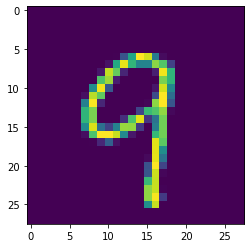

4


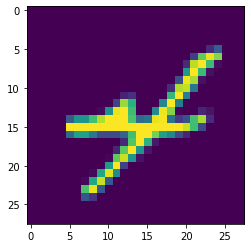

9


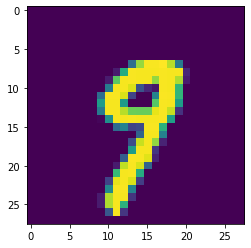

0


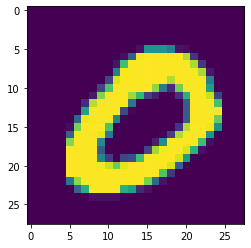

6


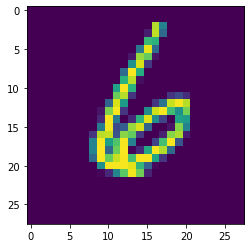

8


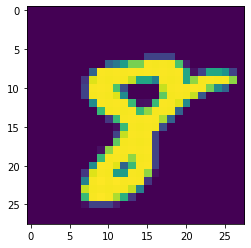

4


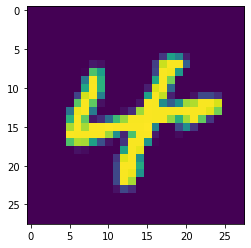

9


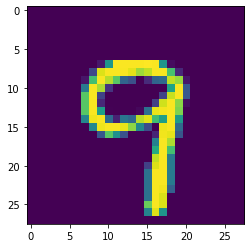

8


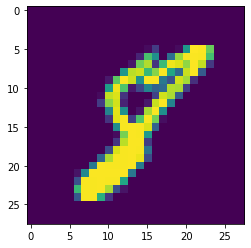

0


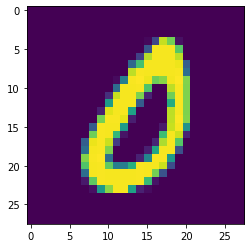

In [7]:
for i in range(10):
  PlotImage(Xtrain,Ytrain)

In [8]:
Xtrain = Xtrain.reshape(16000,28,28,1)
Xtest = Xtest.reshape(4000,28,28,1)

print("training feature", Xtrain.shape)
print("testing feature", Xtest.shape)


training feature (16000, 28, 28, 1)
testing feature (4000, 28, 28, 1)


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [ ]:
early_stopping = EarlyStopping(patience = 8)
checkpoint = ModelCheckpoint("best_model.h5" , save_best_only = True, save_weights_only = True)
lr_scheduler = ReduceLROnPlateau(patience = 5, factor = 0.3)



callbacks = [early_stopping, checkpoint, lr_scheduler]

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(5,5), activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

#ANN
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10)) #output dimension 10 classes( multiclass)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
from matplotlib.colors import from_levels_and_colors
#complilation

loss = SparseCategoricalCrossentropy( from_logits=True)

optimizer = Adam(learning_rate=1e-3)
model.compile(loss=loss, optimizer=optimizer, metrics = ['accuracy'])


In [ ]:
#model.fit(Xtrain, Ytrain, validation_data = (Xtest, Ytest), epochs = 40, batch_size= 128, callbacks = callbacks)

In [ ]:
model.load_weights("/content/sample_data/best_model.h5")

In [ ]:
def DoPrediction(model, X, Y):
  idx = np.random.choice(X.shape[0])
  x = X[idx]
  print("actual output", Y[idx])
  x = x.reshape(1,28,28,1)
  return model.predict(x)



In [ ]:
DoPrediction(model, Xtest, Ytest)

actual output 7


array([[-5.2864523 ,  1.8824861 ,  3.21504   , -0.91385365, -6.439341  ,
        -6.0723066 , -8.001336  , 11.736245  , -2.5479026 , -0.9713789 ]],
      dtype=float32)

In [ ]:
def DoPredictionWithArgMax(model, X, Y):
  idx = np.random.choice(X.shape[0])
  x = X[idx]
  print("actual output", Y[idx])
  x = x.reshape(1,28,28,1)
  prediction = model.predict(x)
  prediction = np.argmax(prediction)
  return prediction

In [ ]:
DoPredictionWithArgMax(model, Xtest, Ytest)

actual output 8


8